In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

import sys

# warning 표기를 없앰
import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["axes.unicode_minus"] = False

- kdeplot : 커널 밀도 곡선
  - 커널 밀도 곡선 : 데이터의 분포를 부드러운 곡선으로 표현한 형태
  - 데이터 자체는 이산적이어도 적용이 가능함
  - 히스토그램보다 시각적으로 뚜렷함

In [3]:
origin = pd.read_excel("./data/iris.xlsx")

In [4]:
df = origin.astype({"Species" : "category"})

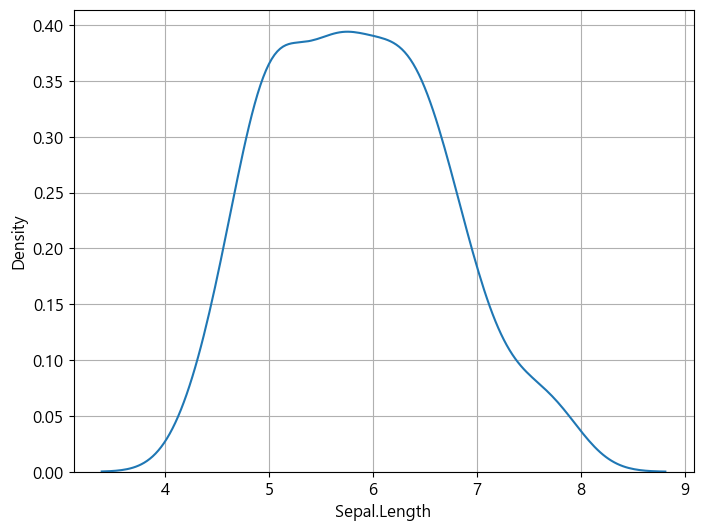

In [5]:
plt.figure()
sb.kdeplot(data = df, x = 'Sepal.Length')
plt.grid()
plt.show()

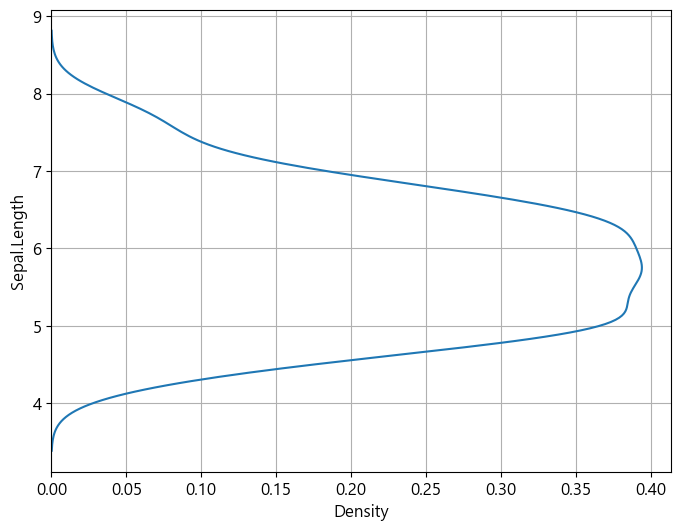

In [6]:
plt.figure()
sb.kdeplot(data = df, y = 'Sepal.Length')
plt.grid()
plt.show()

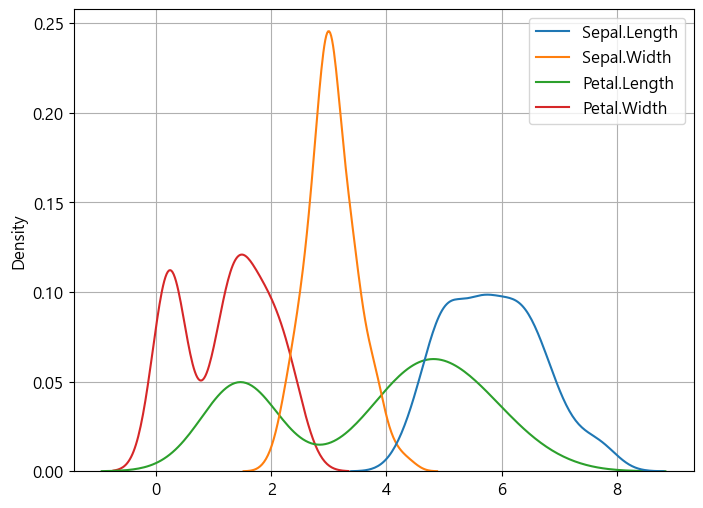

In [7]:
plt.figure()
sb.kdeplot(data = df)
plt.grid()
plt.show()

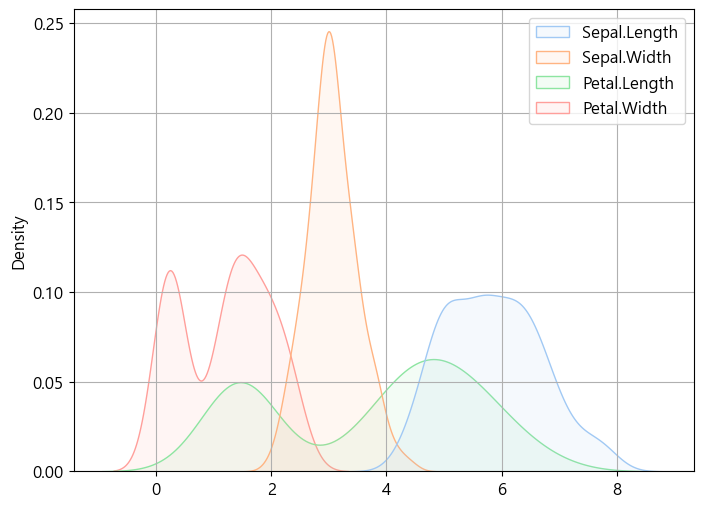

In [8]:
plt.figure()
sb.kdeplot(data = df, fill = True, alpha = 0.1, palette = 'pastel')
plt.grid()
plt.show()

- bw_adjust : 곡선의 대역폭을 설정
  - 파장을 설정하는 것이기 때문에 값이 작을수록 곡선이 격해지며, 클수록 곡선이 완만함 

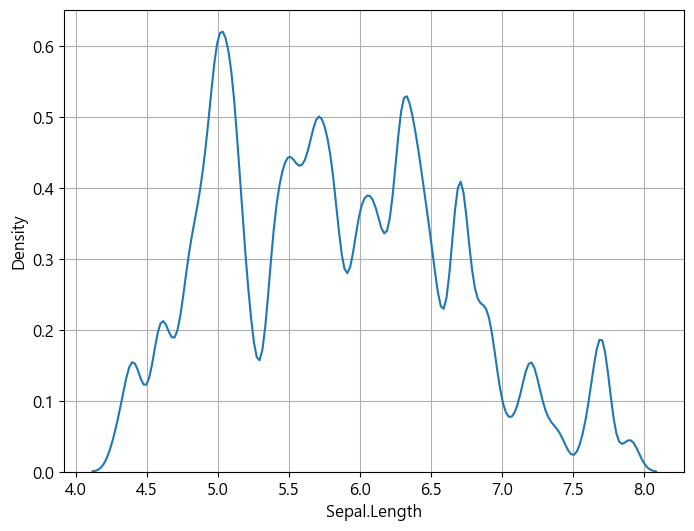

In [9]:
plt.figure()
sb.kdeplot(data = df, x = 'Sepal.Length', bw_adjust = 0.2)
plt.grid()
plt.show()

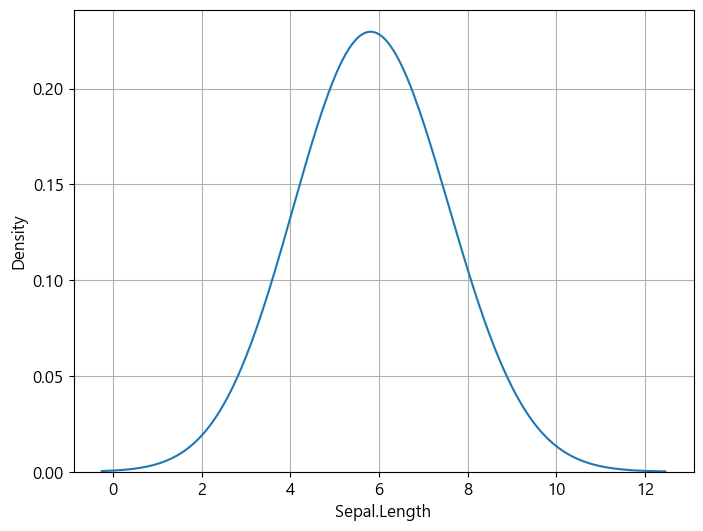

In [10]:
plt.figure()
sb.kdeplot(data = df, x = 'Sepal.Length', bw_adjust = 5)
plt.grid()
plt.show()

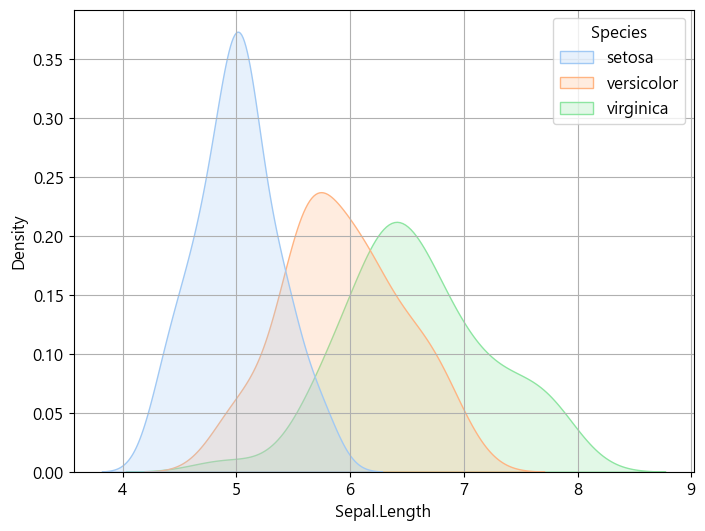

In [11]:
plt.figure()
sb.kdeplot(data = df, x = 'Sepal.Length', fill = True, palette = 'pastel', hue = 'Species')
plt.grid()
plt.show()

- kdeplot의 x, y 좌표를 모두 지정하면 x, y 분포를 등고선 형태로 표현해줌
  - 등고선의 밀도가 산점도의 밀도와 동일하게 나옴

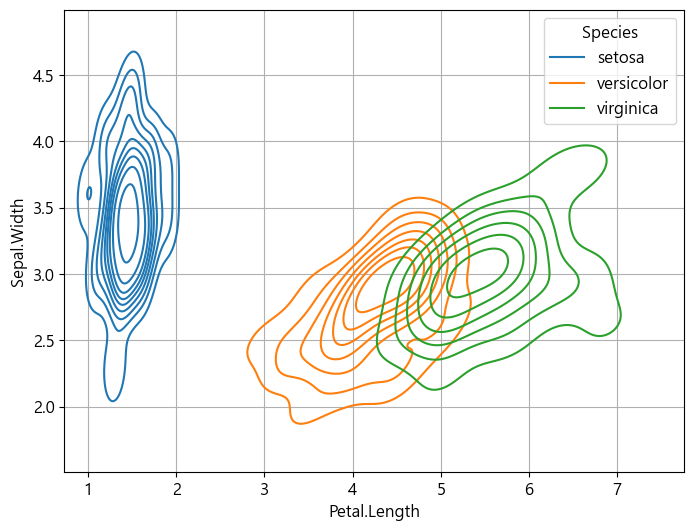

In [12]:
plt.figure()
sb.kdeplot(data = df, x = "Petal.Length", y = "Sepal.Width", hue = "Species")
plt.grid()
plt.show()

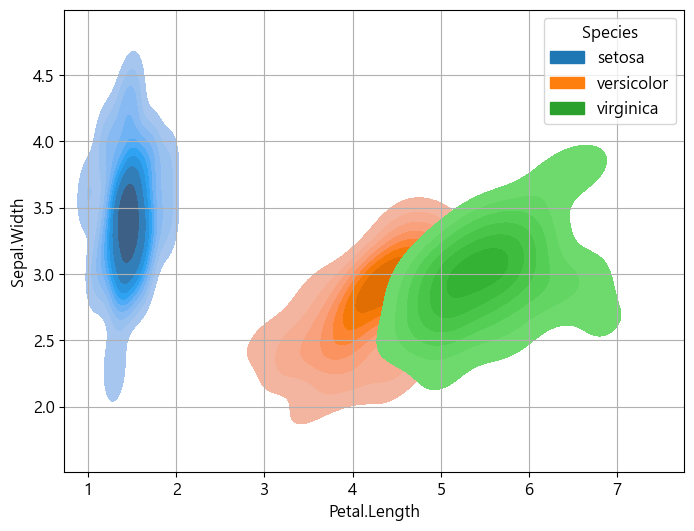

In [13]:
plt.figure()
sb.kdeplot(data = df, x = "Petal.Length", y = "Sepal.Width", hue = "Species", fill = True)
plt.grid()
plt.show()

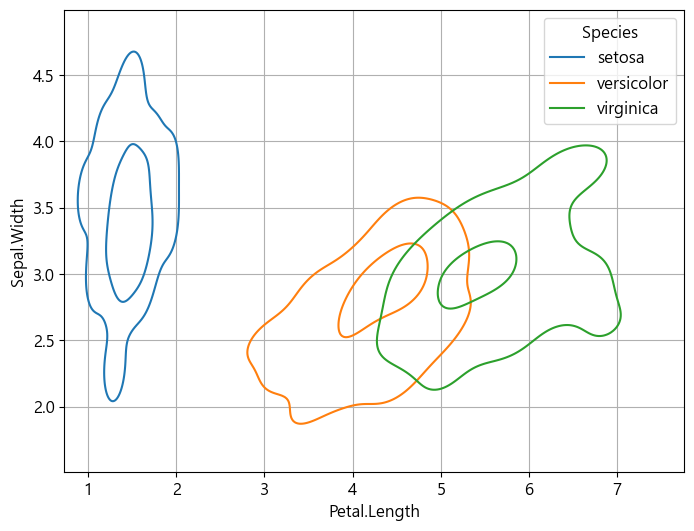

In [14]:
plt.figure()
sb.kdeplot(data = df, x = "Petal.Length", y = "Sepal.Width", hue = "Species", levels = 3)
plt.grid()
plt.show()

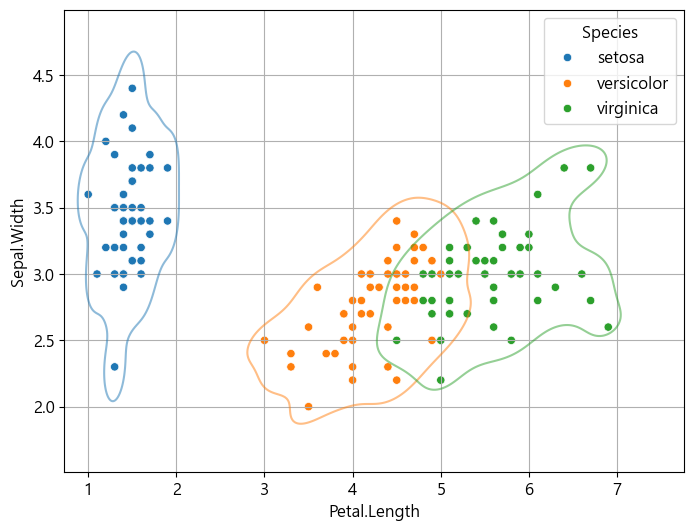

In [15]:
plt.figure()
sb.kdeplot(data = df, x="Petal.Length", y="Sepal.Width", hue="Species", levels=1, alpha=.5)
sb.scatterplot(data = df, x="Petal.Length", y="Sepal.Width", hue="Species")
plt.grid()
plt.show()
plt.close()

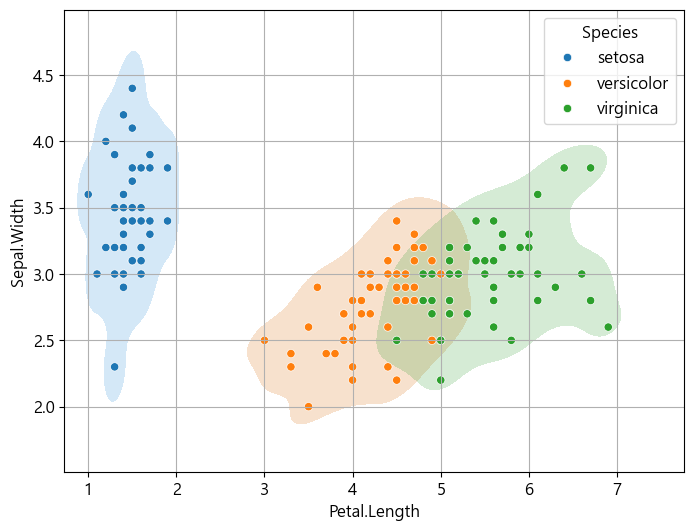

In [16]:
plt.figure()
sb.kdeplot(data=df, x="Petal.Length", y="Sepal.Width", hue="Species", levels=2, fill=True, alpha=.2)
sb.scatterplot(data=df, x="Petal.Length", y="Sepal.Width", hue="Species")
plt.grid()
plt.show()
plt.close()

In [17]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier

In [18]:
?GridSearchCV

Init signature:
GridSearchCV(
    estimator,
    param_grid,
    *,
    scoring=None,
    n_jobs=None,
    refit=True,
    cv=None,
    verbose=0,
    pre_dispatch='2*n_jobs',
    error_score=nan,
    return_train_score=False,
)
Docstring:     
Exhaustive search over specified parameter values for an estimator.

Important members are fit, predict.

GridSearchCV implements a "fit" and a "score" method.
It also implements "score_samples", "predict", "predict_proba",
"decision_function", "transform" and "inverse_transform" if they are
implemented in the estimator used.

The parameters of the estimator used to apply these methods are optimized
by cross-validated grid-search over a parameter grid.

Read more in the :ref:`User Guide <grid_search>`.

Parameters
----------
estimator : estimator object
    This is assumed to implement the scikit-learn estimator interface.
    Either estimator needs to provide a ``score`` function,
    or ``scoring`` must be passed.

param_grid : dict or list of

In [19]:
rf = RandomForestClassifier(random_state = 0)

In [20]:
params = {"max_depth" : [3, 4, 5, 6, 7, 8, 9, 10],
          "n_estimators" : [100, 200, 300, 400, 500]}

In [21]:
gs = GridSearchCV(rf, param_grid = params, n_jobs = -1, cv = 5)

In [22]:
X = df.drop('Species', axis = 1)
Y = df['Species']

In [23]:
x_tr, x_val, y_tr, y_val = train_test_split(X, Y, stratify = Y, random_state=0, test_size = 0.25)

In [24]:
gs.fit(x_tr, y_tr)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [25]:
best_model = gs.best_estimator_

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
accuracy_score(y_val, best_model.predict(x_val))

0.9473684210526315

In [28]:
best_model

RandomForestClassifier(max_depth=3, n_estimators=200, random_state=0)

In [29]:
from sklearn.model_selection import TimeSeriesSplit

In [30]:
?TimeSeriesSplit

Init signature: TimeSeriesSplit(n_splits=5, *, max_train_size=None, test_size=None, gap=0)
Docstring:     
Time Series cross-validator

Provides train/test indices to split time series data samples
that are observed at fixed time intervals, in train/test sets.
In each split, test indices must be higher than before, and thus shuffling
in cross validator is inappropriate.

This cross-validation object is a variation of :class:`KFold`.
In the kth split, it returns first k folds as train set and the
(k+1)th fold as test set.

Note that unlike standard cross-validation methods, successive
training sets are supersets of those that come before them.

Read more in the :ref:`User Guide <time_series_split>`.

.. versionadded:: 0.18

Parameters
----------
n_splits : int, default=5
    Number of splits. Must be at least 2.

    .. versionchanged:: 0.22
        ``n_splits`` default value changed from 3 to 5.

max_train_size : int, default=None
    Maximum size for a single training set.

test_size 

- ConvexHull : 데이터의 외곽선을 지정하는 scipy 객체
  - 점만 지정하므로 완벽한 외곽선을 그리기 위해서는 첫번째 인덱스에 해당하는 지점을 마지막에 추가하여 외곽선을 완성한다

In [31]:
from scipy.spatial import ConvexHull

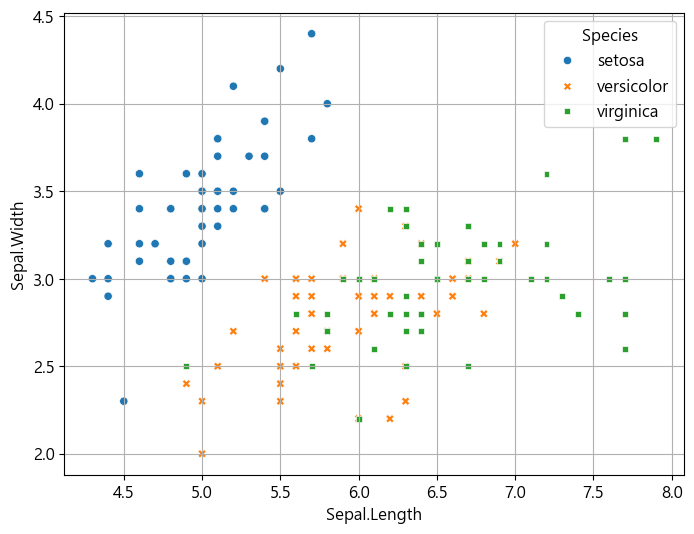

In [32]:
plt.figure()
sb.scatterplot(data = df, x = "Sepal.Length", y = "Sepal.Width", hue = "Species", style = "Species")
plt.grid()
plt.show()

In [33]:
setosa_df = df.loc[df['Species'] == 'setosa', ['Sepal.Length', 'Sepal.Width']]
setosa_df.head()

,Sepal.Length,Sepal.Width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [34]:
hull = ConvexHull(setosa_df)
hull

In [35]:
hull.vertices

array([13, 41, 36, 18, 14, 15, 32, 22], dtype=int32)

In [36]:
points = np.append(hull.vertices, hull.vertices[0])
points

array([13, 41, 36, 18, 14, 15, 32, 22, 13], dtype=int32)

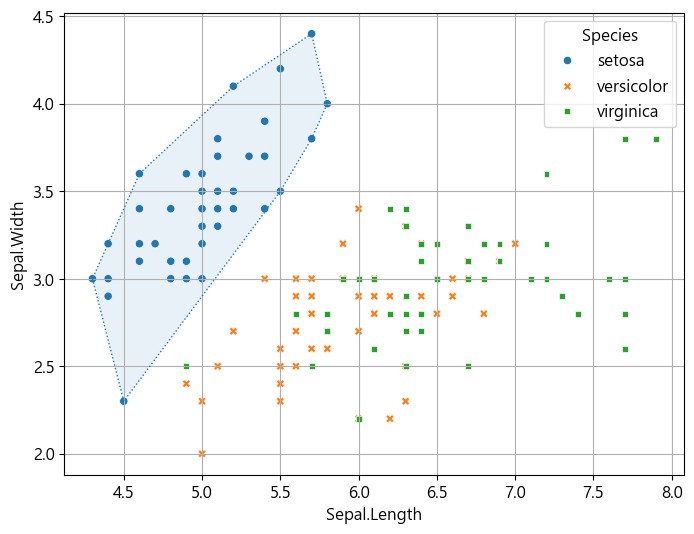

In [37]:
plt.figure()

plt.plot(setosa_df.iloc[points, 0], setosa_df.iloc[points, 1], linewidth = 1, linestyle = ":")
plt.fill(setosa_df.iloc[points, 0], setosa_df.iloc[points, 1], alpha = 0.1)

sb.scatterplot(data = df, x = "Sepal.Length", y = "Sepal.Width", hue = "Species", style = "Species")

plt.grid()
plt.show()

In [38]:
classes = df['Species'].unique()
classes

['setosa', 'versicolor', 'virginica']
Categories (3, object): ['setosa', 'versicolor', 'virginica']

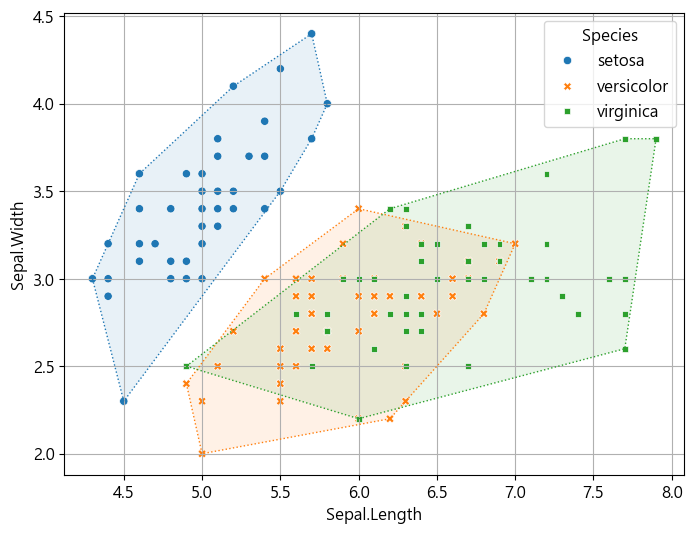

In [39]:
plt.figure()

for c in classes:
    df_c = df.loc[df['Species'] == c, ['Sepal.Length', 'Sepal.Width']]
    
    hull = ConvexHull(df_c)
    points = np.append(hull.vertices, hull.vertices[0])
    
    plt.plot(df_c.iloc[points, 0], df_c.iloc[points, 1], linewidth=1, linestyle=":")
    plt.fill(df_c.iloc[points, 0], df_c.iloc[points, 1], alpha=0.1)
    
sb.scatterplot(data=df, x='Sepal.Length', y='Sepal.Width', hue='Species', style='Species')
    
plt.grid()
plt.show()
plt.close()

In [40]:
origin = pd.read_excel("./data/grade.xlsx", index_col = "이름")
origin.head()

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,77,88,64
영희,2,여자,88,120,62,72
민철,1,남자,92,70,83,79
수현,3,여자,63,60,31,71
호영,4,남자,75,50,90,88


In [41]:
df = origin.iloc[:, 2:].head()
df

,국어,영어,수학,과학
이름,,,,
철수,98,77,88,64
영희,88,120,62,72
민철,92,70,83,79
수현,63,60,31,71
호영,75,50,90,88


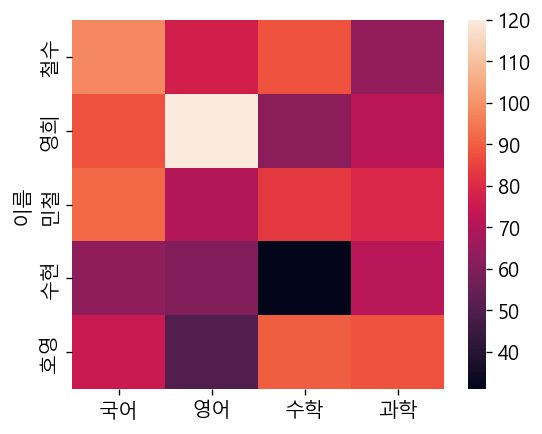

In [42]:
plt.figure(figsize=(5, 4), dpi=120)
sb.heatmap(df)
plt.show()
plt.close()

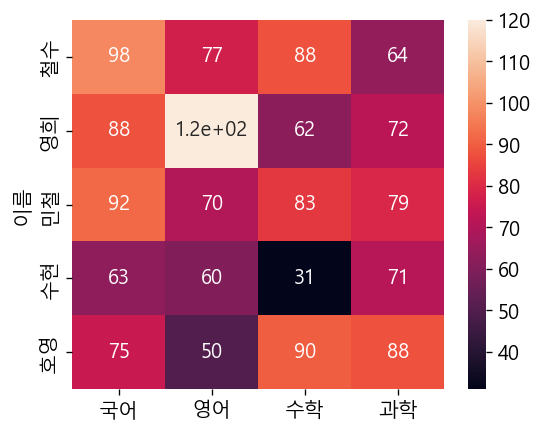

In [43]:
plt.figure(figsize=(5, 4), dpi=120)
sb.heatmap(df, annot=True)
plt.show()
plt.close()

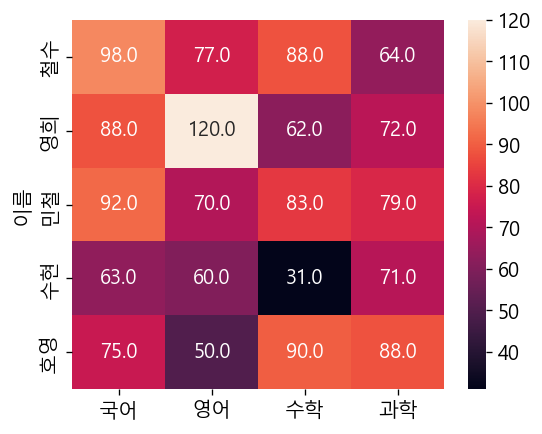

In [44]:
plt.figure(figsize=(5, 4), dpi=120)
sb.heatmap(df, annot=True, fmt="0.1f")
plt.show()
plt.close()

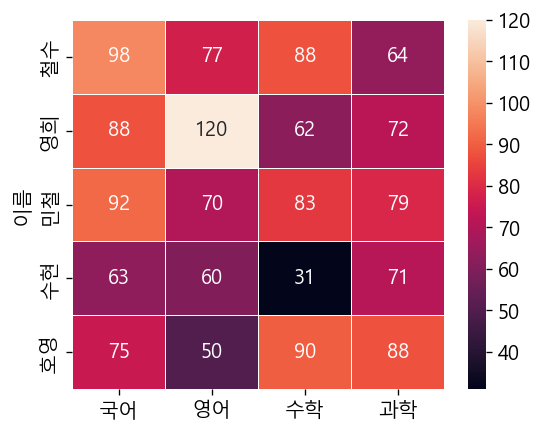

In [45]:
plt.figure(figsize=(5, 4), dpi=120)
sb.heatmap(df, annot=True, fmt="d", linewidth=0.5)
plt.show()
plt.close()

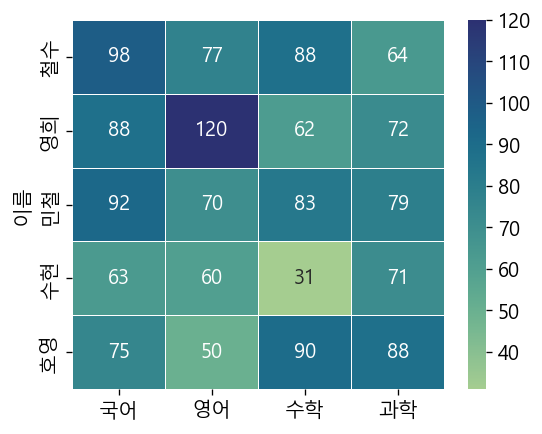

In [46]:
plt.figure(figsize=(5, 4), dpi=120)
sb.heatmap(df, annot=True, fmt="d", linewidth=.5, cmap="crest")
plt.show()
plt.close()

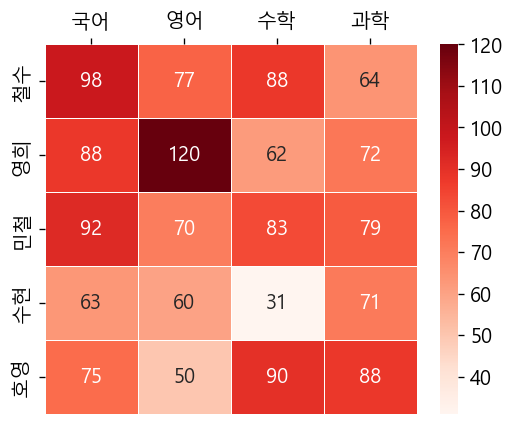

In [51]:
plt.figure(figsize=(5, 4), dpi=120)

# 객체를 리턴받음
ax = sb.heatmap(df, annot=True, fmt="d", linewidth=.5, cmap="Reds")

# x,y축의 라벨 변경
ax.set(xlabel="", ylabel="")

# x축의 변수 이름을 상단으로 이동
ax.xaxis.tick_top()

plt.show()
plt.close()